<a href="https://colab.research.google.com/github/shwethashaji-ai/cognifyzTech_ML/blob/main/location_based_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv('/content/Dataset .csv')
df


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
# --------------------- Step 1: Map Restaurant Distribution ---------------------
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)
heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()
HeatMap(heat_data).add_to(restaurant_map)
restaurant_map.save("restaurant_heatmap.html")

In [5]:
# --------------------- Step 2: Analyze Restaurant Concentration ---------------------
city_counts = df["City"].value_counts().reset_index()
city_counts.columns = ["City", "Restaurant Count"]
locality_counts = df["Locality"].value_counts().reset_index()
locality_counts.columns = ["Locality", "Restaurant Count"]

In [6]:
# --------------------- Step 3: Calculate Ratings, Cuisine Diversity & Price ---------------------
city_stats = df.groupby("City").agg(
    Avg_Rating=("Aggregate rating", "mean"),
    Avg_Price_Range=("Price range", "mean"),
    Cuisine_Count=("Cuisines", lambda x: x.nunique())
).reset_index()

locality_stats = df.groupby("Locality").agg(
    Avg_Rating=("Aggregate rating", "mean"),
    Avg_Price_Range=("Price range", "mean"),
    Cuisine_Count=("Cuisines", lambda x: x.nunique())
).reset_index()


<ipython-input-7-fdfed844d76b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts.head(10), x="Restaurant Count", y="City", palette="Blues_r")


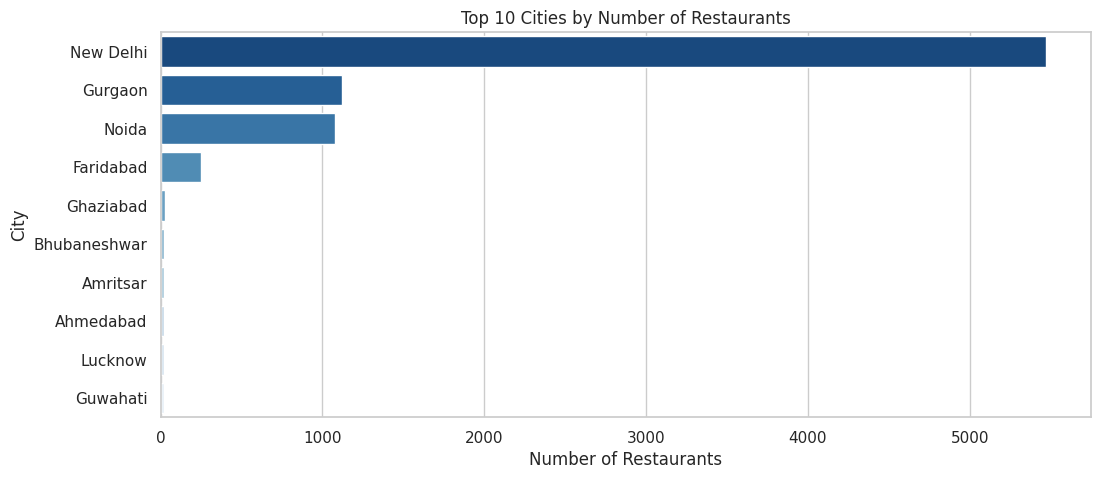

In [7]:
# --------------------- Step 4: Visualizations ---------------------
sns.set(style="whitegrid")

# Top 10 Cities by Restaurant Count
plt.figure(figsize=(12, 5))
sns.barplot(data=city_counts.head(10), x="Restaurant Count", y="City", palette="Blues_r")
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()


<ipython-input-8-6270a6f8e40c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=locality_counts.head(10), x="Restaurant Count", y="Locality", palette="Greens_r")


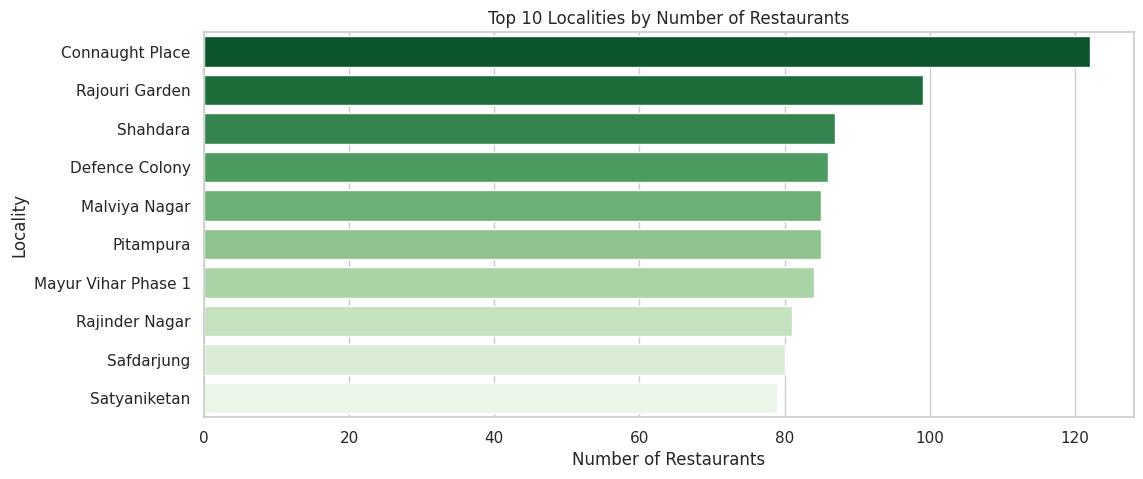

In [8]:
# Top 10 Localities by Restaurant Count
plt.figure(figsize=(12, 5))
sns.barplot(data=locality_counts.head(10), x="Restaurant Count", y="Locality", palette="Greens_r")
plt.title("Top 10 Localities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.show()

<ipython-input-9-5920a981401b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_stats.sort_values(by="Avg_Rating", ascending=False).head(10),


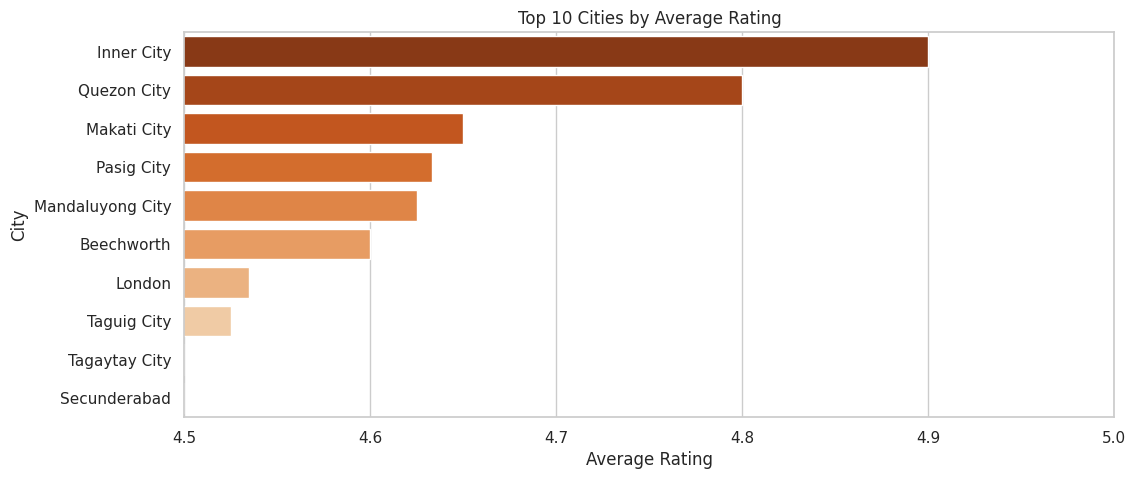

In [9]:
# Top 10 Cities by Average Rating
plt.figure(figsize=(12, 5))
sns.barplot(data=city_stats.sort_values(by="Avg_Rating", ascending=False).head(10),
            x="Avg_Rating", y="City", palette="Oranges_r")
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.xlim(4.5, 5)
plt.ylabel("City")
plt.show()

<ipython-input-10-a0717c753ec2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=locality_stats.sort_values(by="Avg_Rating", ascending=False).head(10),


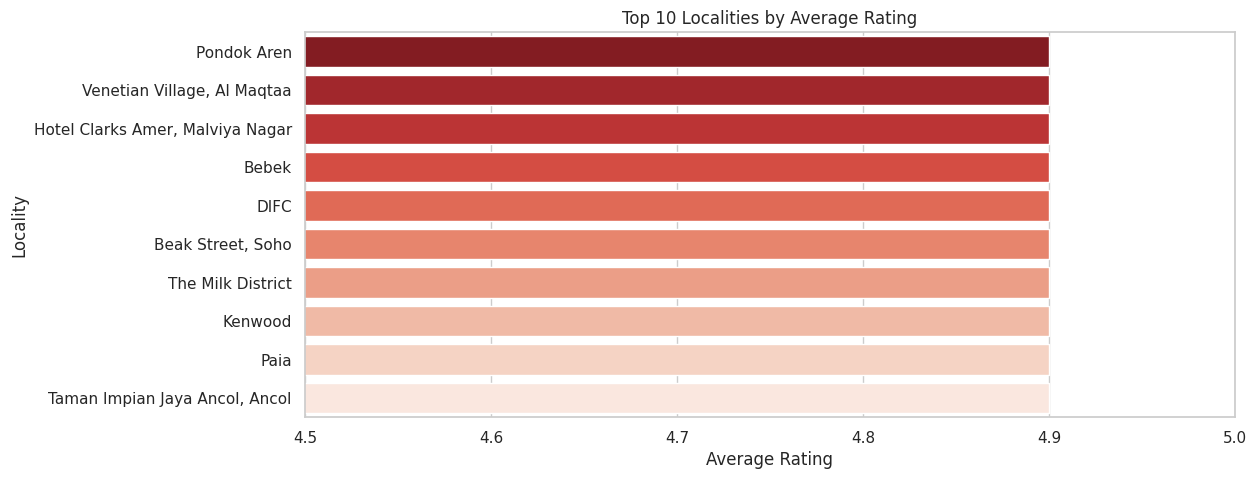

In [10]:
# Top 10 Localities by Average Rating
plt.figure(figsize=(12, 5))
sns.barplot(data=locality_stats.sort_values(by="Avg_Rating", ascending=False).head(10),
            x="Avg_Rating", y="Locality", palette="Reds_r")
plt.title("Top 10 Localities by Average Rating")
plt.xlabel("Average Rating")
plt.xlim(4.5, 5)
plt.ylabel("Locality")
plt.show()


In [11]:
print("Analysis complete! Heatmap saved as 'restaurant_heatmap.html'.")

Analysis complete! Heatmap saved as 'restaurant_heatmap.html'.
